## Phase 2.18

# Linear Regression
## Objectives
- Understand the differences between variance, covariance and correlation.
- Be able to explain each piece of the linear regression formula including terminology typically associated with regression.
- Understand the assumptions of regression.
- Use diabetes dataset to fit a simple linear regression model using `statsmodels` package.

## What is linear regression? 
> Regression Analysis is a **parametric** technique, meaning **a set of parameters are used to predict the value of an unknown target** variable (or dependent variable) based on one or more of known input features (or independent variables, predictors).

## Covariance and Correlation

The idea of _correlation_ is the simple idea that variables often change _together_. For a simple example, cities with more buses tend to have higher populations.

We might observe that, as one variable X increases, so does another Y, OR that as X increases, Y decreases.

The _covariance_ describes how two variables co-vary. Note the similarity in the definition to the definition of ordinary variance:


---

**Variance**: Measure of dispersion from the mean for continuous random variables. How far a set of numbers are spread out from their overall average value.


$n$ = # of data points

$x_i$ = individuals data points

$mu$ = mean 

$$\large \sigma^2 = \sum_{i}^{n}\frac{(x_i -\mu )^2}{n}$$

**Covariance**: Measure of how variables differ/relate to one another
$$\large \sigma_{xy} = \frac{\sum_{i,j}^{n} (x_i -\mu_x )(y_j - \mu_y)}{n}$$

---

* Positive covariance  --> correlates (together)
* Negative covariance --> correlates inversely

But ranges (-∞,∞) so what is a "stronger" relationship?

So, we need: 

## Correlation
Pearson's Correlation: Normalizes covariance so relationships are now represented on a [-1, 1] scale

$$\large r = \frac{\sum_{i,j}^{n}(x_i -\mu_x)(y_j - \mu_y)} {\sqrt{\sum_{i,j}^{n}(x_i - \mu_x)^2 (y_j-\mu_y)^2}}$$

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-0-10-03-cov-corr-online-ds-sp-000/master/images/correlation.png' width=70%/>

In [1]:
# Load libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 
plt.style.use('seaborn-talk')

import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('data/diabetes.csv', index_col=0)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


> *Note:* *Examples in this lecture use the Pima Indians Diabetes data which was taken from a larger collection of data, originally collected by the National Institute of Diabetes and Digestive Kidney Diseases. It provides diagnostic data on 768 females of Pima Indian heritage aged 21 years or older. The analyses presented in this post are intended to illustrate an approach to linear regression modeling and should not be used to draw substantive conclusions on biomedical pathologies.*

In [3]:
# Filter dataframe to Age (x) and Glucose (y).
df = df.loc[:, ["Age", "Glucose"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Age      768 non-null    int64
 1   Glucose  768 non-null    int64
dtypes: int64(2)
memory usage: 18.0 KB


In [4]:
df.head()

,Age,Glucose
0,50,148
1,31,85
2,32,183
3,21,89
4,33,137


> The Age column provides each participant's age measured in years. Glucose is a measure of each participant's plasma glucose concentration at 2 hours from an oral glucose tolerance test. In the current analyses we will use age to predict participants' plasma glucose concentration.

## Terminology 


### Basics: 
**Independent Variable:** the data we are using to make a prediction. In this case: _Age_. <br/>
AKA - predictor, feature, inputs. 

**Dependent Variable:** the data we are trying to predict. In this case: _glucose_. <br/>
AKA - target, outcome or outputs. 

For our first model:

$\LARGE y = mx + b $

Here:

- $x$: input column (just one for now)
- $y$: output column (column we're trying to predict)

Solving for the coefficients $m$ (our slope) and $b$ (y-intercept)  - based on the line that 'best' represents the relationship between $x$ and $y$, _assuming_ that relationship is a straight line.

---

The equivalent (and more generalized) formula that you may encounter more often is;

$\LARGE y = \beta_0 + \beta_1x_1$

> *Or expanded,* $\LARGE y = \beta_0 + \beta_1x_1 + \beta_2x_2 \dots \beta_nx_n$

where $\beta_0$ is the coefficient associated with the intercept (a constant). 
> *In reality, the first term is $\beta_0x_0$ where $x_0$ is the intercept. Since the intercept is a constant, we can leave it as just $\beta_0$*

**Let's pre-process our data and do a tiny bit of EDA.** 

In [5]:
# Describe.
df.describe()

,Age,Glucose
count,768.000000,768.000000
mean,33.240885,120.894531
std,11.760232,31.972618
min,21.000000,0.000000
25%,24.000000,99.000000
50%,29.000000,117.000000
75%,41.000000,140.250000
max,81.000000,199.000000


In [6]:
# Check for missing values
df.isna().sum()

Age        0
Glucose    0
dtype: int64

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

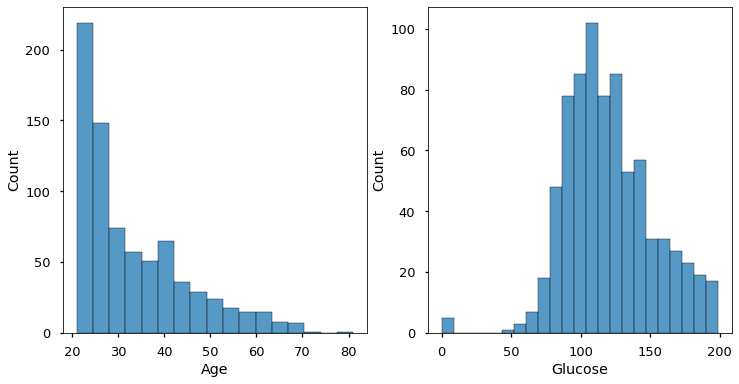

In [7]:
# Visualize the two distributions.
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
sns.histplot(x='Age', data=df, ax=ax1)
sns.histplot(x='Glucose', data=df, ax=ax2)

In [8]:
# Check for target values of 0.
(df['Glucose'] == 0).sum()

5

In [9]:
# Drop rows where NaN or Glucose is 0.
df = df.loc[df['Glucose'] != 0, :]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 767
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Age      763 non-null    int64
 1   Glucose  763 non-null    int64
dtypes: int64(2)
memory usage: 17.9 KB


In [11]:
# Checking correlation.
df[["Age", "Glucose"]].corr()

,Age,Glucose
Age,1.000000,0.267136
Glucose,0.267136,1.000000


We can visualize this relationship with a scatterplot to get a better idea of the observed relationship between age and glucose levels.

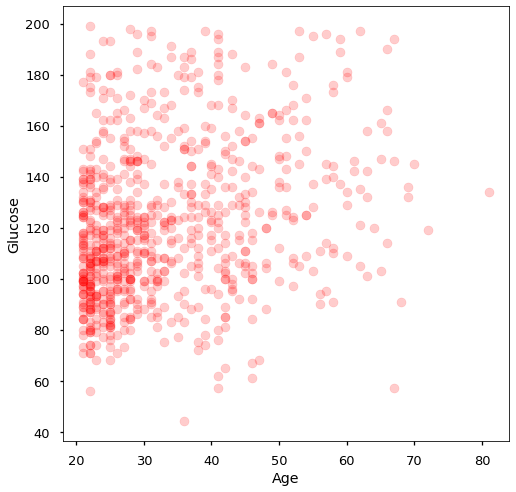

In [12]:
# Scatterplot - comparing two variables.
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(df["Age"], df["Glucose"], color='r', alpha=0.2)
ax.set(xlabel='Age', ylabel='Glucose');

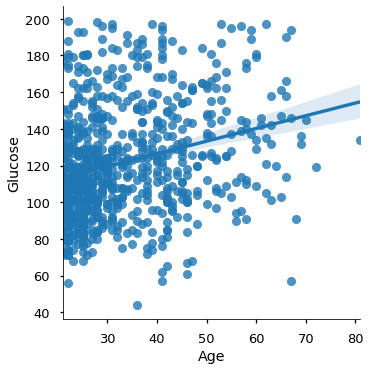

In [13]:
# Plot using sns.lmplot - including regression line.
sns.lmplot(x='Age', y='Glucose', data=df)
plt.show()

## Let's build a model using StatsModels 

In [14]:
import statsmodels.api as sm # Method 1 below
import statsmodels.formula.api as smf # Method 2 below

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Method 1

In [15]:
# Instantiate model.
model = sm.OLS(df['Glucose'], df['Age'])

# Fit model to data and return results.
results = model.fit()

# Look at the summary table.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Glucose   R-squared (uncentered):                   0.876
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                              5401.
Date:                Thu, 05 Aug 2021   Prob (F-statistic):                        0.00
Time:                        16:05:27   Log-Likelihood:                         -3971.9
No. Observations:                 763   AIC:                                      7946.
Df Residuals:                     762   BIC:                                      7950.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            3.3280      0.045     73.493      0.000       3.239       3.417
==============================================================================
Omnibus:                       38.923   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.659
Skew:                          -0.505   Prob(JB):                     7.38e-11
Kurtosis:                       3.668   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Method 2

In [16]:
# Set variables
target = 'Glucose'
x_variables = ['Age'] # We can/will have many!

# Set formula.
formula = f'{target}~{"+".join(x_variables)}' 
# >>> 'Glucose~Age'

# Show results (without storing as a variable).
(smf.ols(formula, data=df)
 .fit()
 .summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Glucose   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     58.48
Date:                Thu, 05 Aug 2021   Prob (F-statistic):           6.21e-14
Time:                        16:05:27   Log-Likelihood:                -3662.5
No. Observations:                 763   AIC:                             7329.
Df Residuals:                     761   BIC:                             7338.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     98.6324      3.198     30.845      0.000      92.355     104.910
Age            0.6929      0.091      7.647      0.000       0.515       0.871
==============================================================================
Omnibus:                       26.554   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.808
Skew:                           0.475   Prob(JB):                     5.55e-07
Kurtosis:                       2.932   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Points of Interest
- $\large R^2$: *Coefficient of Determination*
    -  Proportion of variance explained by the regression. 
    - This value tells us that our model - with just one independent variable - accounts for roughly {$R^2 \%$} of the variance in glucose levels.
    
    
- $\large \text{Adjusted} R^2$
    - Adjusted $R^2$ value that is weighted to potential noise in the model (the more features, the lower the Adjusted $R^2$.
    
    
- `coef`: $\large m$ or $\large \beta_{x_1}$


- `P>|t|`: P-value regarding the variable's significance. 
    - $H_0$: The variable's impact on the target is by random chance.
    
    
- `Omnibus` / `Prob(Omnibus)` and `Jarque-Bera (JB)` / `Prob(JB)`
    - Tests for normal distribution of residuals.
        - $H_0$ is the residuals come from a normal distribution.
        
        
- `Durbin-Watson` 
    - Test for error homoskedasticity. We're looking for values between ~1.5 and ~2.5.

In [17]:
# Adding a constant to our X.
X = sm.add_constant(df['Age'])
X

,const,Age
0,1.0,50
1,1.0,31
2,1.0,32
3,1.0,21
4,1.0,33
...,...,...
763,1.0,63
764,1.0,27
765,1.0,30
766,1.0,47


In [18]:
# Fit a new model with a constant included.
model2 = sm.OLS(df["Glucose"], X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Glucose   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     58.48
Date:                Thu, 05 Aug 2021   Prob (F-statistic):           6.21e-14
Time:                        16:05:27   Log-Likelihood:                -3662.5
No. Observations:                 763   AIC:                             7329.
Df Residuals:                     761   BIC:                             7338.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.6324      3.198     30.845      0.000      92.355     104.910
Age            0.6929      0.091      7.647      0.000       0.515       0.871
==============================================================================
Omnibus:                       26.554   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.808
Skew:                           0.475   Prob(JB):                     5.55e-07
Kurtosis:                       2.932   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The $R^2$ value in this output is  much smaller than the $R^2$ from the model excluding the intercept. The lesson here is that when the intercept is excluded from a linear regression model the $R^2$ is artificially inflated. (See below for technical description.) 

> *When you run the regression without a constant in the model, you are declaring that the expected value of Y when x is equal to 0 is 0. That is, $E(Y | x = 0) = 0$. If this is not the case, the values of $\hat{y}$ will be different yielding different $SS_{model}$ and $SS_{residual}$ hence different $R^2$ and F values. Typically, the sum of squares of Y accounted for by the intercept are not included in the total sum of squares. That is, they are neither in $SS_{model}$ nor $SS_{residual}$. That is the model is predicting the sum of squares left over after taking out the intercept. When the intercept (or constant term) is left off and it does not have a true zero effect, the total sum of squares being modeled is increased. This tends to inflate both $SS_{model}$ and $SS_{residual}$; however, $SS_{model}$ increases relatively more than $SS_{residual}$ leading to the increase in $R^2$ values.*
>
> *https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-why-are-r2-and-f-so-large-for-models-without-a-constant/*

Moving to the middle of the output, we now have an additional set of results. 

Namely, the row labeled `const` , which provides the results for the intercept. 
- The `coef` value for `const` is the value at the intercept $x=0$.
- The `coef` value of `Age` means that with each one-year increase in age, glucose concentration is predicted to increase by this value. 

---

We can plug the intercept and regression weight estimates from the `statsmodels` output into the prediction equation.

$\large y = mx + b$ or $\large y = \beta_0(1) + \beta_{1}x_1$

$\large \text{Glucose} = \text{const[coef]} + \text{(Age[coef])(Age_value)}$

### The regression line and the associated error.

- Regression Line
- Residuals (Error)
    - A **residual** is the difference between the actual value and the predicted value for a point we tried to predict where we knew the actual correct answer.
    - $\large \text{Squared Sum of Residuals} = \sum\limits_{i=1}^{n} (y_i - \text{y_pred}_{i})^{2}$


- **Intro to Modeling Metrics**
    - *Mean Absolute Error*
    - *Mean Squared Error*
    - *Root Mean Squared Error*

<img src='https://rasbt.github.io/mlxtend/user_guide/regressor/LinearRegression_files/simple_regression.png' />

## Coefficient of Determination 

Very often a data scientist will calculate $R^2$, the *coefficient of determination*, as a measure of how well the model fits the data.

$R^2$ for a model is ultimately a _relational_ notion. It's a measure of goodness of fit _relative_ to a (bad) baseline model. This bad baseline model is simply the horizontal line $\large y = \mu_Y$, for dependent variable $Y$.

The actual calculation of $R^2$ is:

$\Large R^2\equiv 1-\frac{\Sigma_i(y_i - \hat{y}_i)^2}{\Sigma_i(y_i - \bar{y})^2}$.

$R^2$ is a measure of how much variation in the dependent variable your model explains.

## Assumptions of Linear Regression 



### 1. Linearity

**The relationship between the target and predictor is linear.** Check this by drawing a scatter plot of your predictor and your target, and see if there is evidence that the relationship might not follow a straight line OR look at the correlation coefficient.

**What can I do if it looks like I'm violating this assumption?**

- Consider log-scaling your data.
- Consider a different type of model!

### 2. Normality
The normality assumption states that the model _residuals_ should follow a normal distribution.
**Note**: the normality assumption talks about the model residuals and not about the distributions of the variables!

**How can I check for this?**
* Check the Omnibus value (This is a test for error normality. The probability is the chance that the errors are normally distributed.)
    - Normal Test *https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html*
* Build a QQ-Plot.

**What can I do if it looks like I'm violating this assumption?**
* Drop outliers 
* Consider log-scaling your data 

#### Let's look at a qqplot of our residuals 

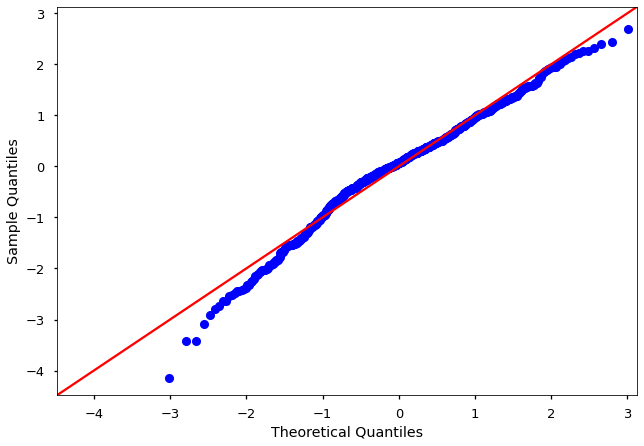

In [19]:
residuals = results.resid
fig = sm.graphics.qqplot(residuals, line='45', fit=True);

***Demo: Sample Residual Distributions and their QQ-plots.***

<img src='https://github.com/learn-co-students/dsc-01-10-11-regression-assumptions-online-ds-ft-031119/raw/master/images/inhouse_qq_plots.png' width=700/>

## 3. Homoskedasticity

The errors should be homoskedastic. That is, the errors have the same variance.

Basically if the residuals are evenly spread through range

<img src='https://github.com/learn-co-students/dsc-01-10-11-regression-assumptions-online-ds-ft-031119/raw/master/images/homo_2.png' width=700/>

The residual errors have the same variance.

**How can I check for this?**

* Check the Durbin-Watson score (This is a test for error homoskedasticity. We're looking for values between ~1.5 and ~2.5).
    - Documentation: *https://www.statsmodels.org/stable/generated/statsmodels.stats.stattools.durbin_watson.html*
    - Demonstration: *https://www.statology.org/durbin-watson-test-python/*
* Build an error plot, i.e. a plot of errors for a particular predictor (vs. the values of that predictor).

**What can I do if it looks like I'm violating this assumption?**

* Consider dropping extreme values.
* Consider log-scaling your target.
* Consider a different type of model!

## Violations of Assumptions

No model is perfect, and your assumptions will never hold perfectly. If the violations of assumptions are severe, you can try adjusting the data so the assumptions will hold, such as by... 

- Transforming your data with a non-linear function (e.g. log)
- Only modeling a subset of your data
- Dropping outliers

These can make it harder to explain or interpret your model, but the trade-off may be worth it. Alternatively, you may be better of just using a different type of model (you will learn many).

### Recap
* **Pearson correlation coefficient** measures the strength of a relationship between two variables ranging from -1(perfect negative relationship) to 1(perfect positive relationship)
* A **loss function** calculates how well a given model represents the relationship between data values
* A **linear regression** is simply a (straight) line of best fit for predicting a continuous value (y = mx + b)
* The **Coefficient of Determination** (R Squared) can be used to determine how well a given line fits a given data set
* Certain **assumptions** must hold true for a least squares linear regression to be useful - linearity, normality and homoskedasticity
* **Q-Q plots** can check for normality in residual errors
* The **omnibus-value** can be used to test for normality
* **Durbin-watson** score and error plots can check for homoskedasticity